In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [6]:
df = pd.read_csv('ionosphere.data')

In [7]:
df.head

<bound method NDFrame.head of      1  0  0.99539  -0.05889  0.85243  0.02306  0.83398  -0.37708      1.1  \
0    1  0  1.00000  -0.18829  0.93035 -0.36156 -0.10868  -0.93597  1.00000   
1    1  0  1.00000  -0.03365  1.00000  0.00485  1.00000  -0.12062  0.88965   
2    1  0  1.00000  -0.45161  1.00000  1.00000  0.71216  -1.00000  0.00000   
3    1  0  1.00000  -0.02401  0.94140  0.06531  0.92106  -0.23255  0.77152   
4    1  0  0.02337  -0.00592 -0.09924 -0.11949 -0.00763  -0.11824  0.14706   
5    1  0  0.97588  -0.10602  0.94601 -0.20800  0.92806  -0.28350  0.85996   
6    0  0  0.00000   0.00000  0.00000  0.00000  1.00000  -1.00000  0.00000   
7    1  0  0.96355  -0.07198  1.00000 -0.14333  1.00000  -0.21313  1.00000   
8    1  0 -0.01864  -0.08459  0.00000  0.00000  0.00000   0.00000  0.11470   
9    1  0  1.00000   0.06655  1.00000 -0.18388  1.00000  -0.27320  1.00000   
10   1  0  1.00000  -0.54210  1.00000 -1.00000  1.00000  -1.00000  1.00000   
11   1  0  1.00000  -0.16316  1.00

In [8]:
df.columns = ['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'attr7', 'attr8', 'attr8', 'attr9', 'attr10', 'attr11', 'attr12', 'attr13',
             'attr14', 'attr15','attr16', 'attr17','attr18', 'attr19','attr20', 'attr21','attr22', 'attr23','attr24', 'attr25','attr26', 'attr27',
             'attr28', 'attr29','attr30', 'attr31','attr32', 'attr34', 'label']

In [9]:
df.describe()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr8,attr9,...,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr34
count,350.000000,350.0,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,0.891429,0.0,0.640330,0.044667,0.600350,0.116154,0.549284,0.120779,0.510453,0.181756,...,0.395643,-0.069928,0.542015,-0.068417,0.378919,-0.027013,0.352313,-0.002248,0.349829,0.015816
std,0.311546,0.0,0.498059,0.442032,0.520431,0.461443,0.493124,0.520816,0.507117,0.484482,...,0.579206,0.508675,0.516896,0.550411,0.576642,0.508425,0.572289,0.513491,0.523339,0.468338
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.471518,-0.065388,0.412555,-0.024868,0.209105,-0.053483,0.086785,-0.049003,...,0.000000,-0.323745,0.283612,-0.428992,0.000000,-0.234935,0.000000,-0.239347,0.000000,-0.161013
50%,1.000000,0.0,0.870795,0.016700,0.808620,0.021170,0.728000,0.015085,0.682430,0.017550,...,0.549175,-0.014915,0.708530,-0.017685,0.499215,0.000000,0.446875,0.000000,0.413115,0.000000
75%,1.000000,0.0,1.000000,0.194727,1.000000,0.335318,0.970445,0.451572,0.950555,0.536192,...,0.907165,0.157922,0.999972,0.154862,0.884572,0.154218,0.859490,0.200935,0.816777,0.172105
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.dtypes

attr1       int64
attr2       int64
attr3     float64
attr4     float64
attr5     float64
attr6     float64
attr7     float64
attr8     float64
attr8     float64
attr9     float64
attr10    float64
attr11    float64
attr12    float64
attr13    float64
attr14    float64
attr15    float64
attr16    float64
attr17    float64
attr18    float64
attr19    float64
attr20    float64
attr21    float64
attr22    float64
attr23    float64
attr24    float64
attr25    float64
attr26    float64
attr27    float64
attr28    float64
attr29    float64
attr30    float64
attr31    float64
attr32    float64
attr34    float64
label      object
dtype: object

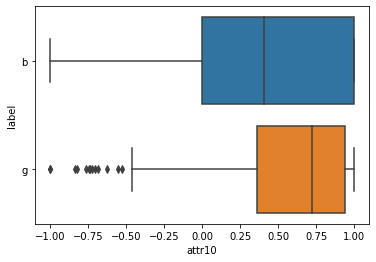

In [22]:
sns.boxplot(df.attr10,df.label)

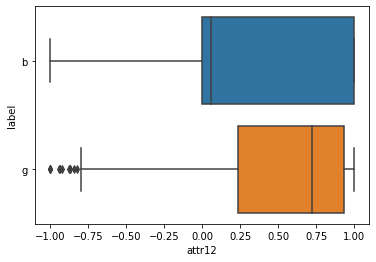

In [19]:
sns.boxplot(df.attr12,df.label)

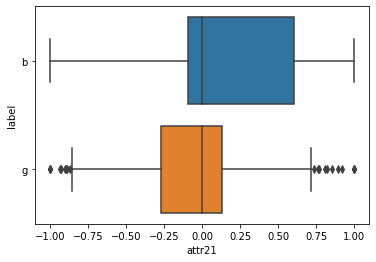

In [20]:
sns.boxplot(df.attr21,df.label)

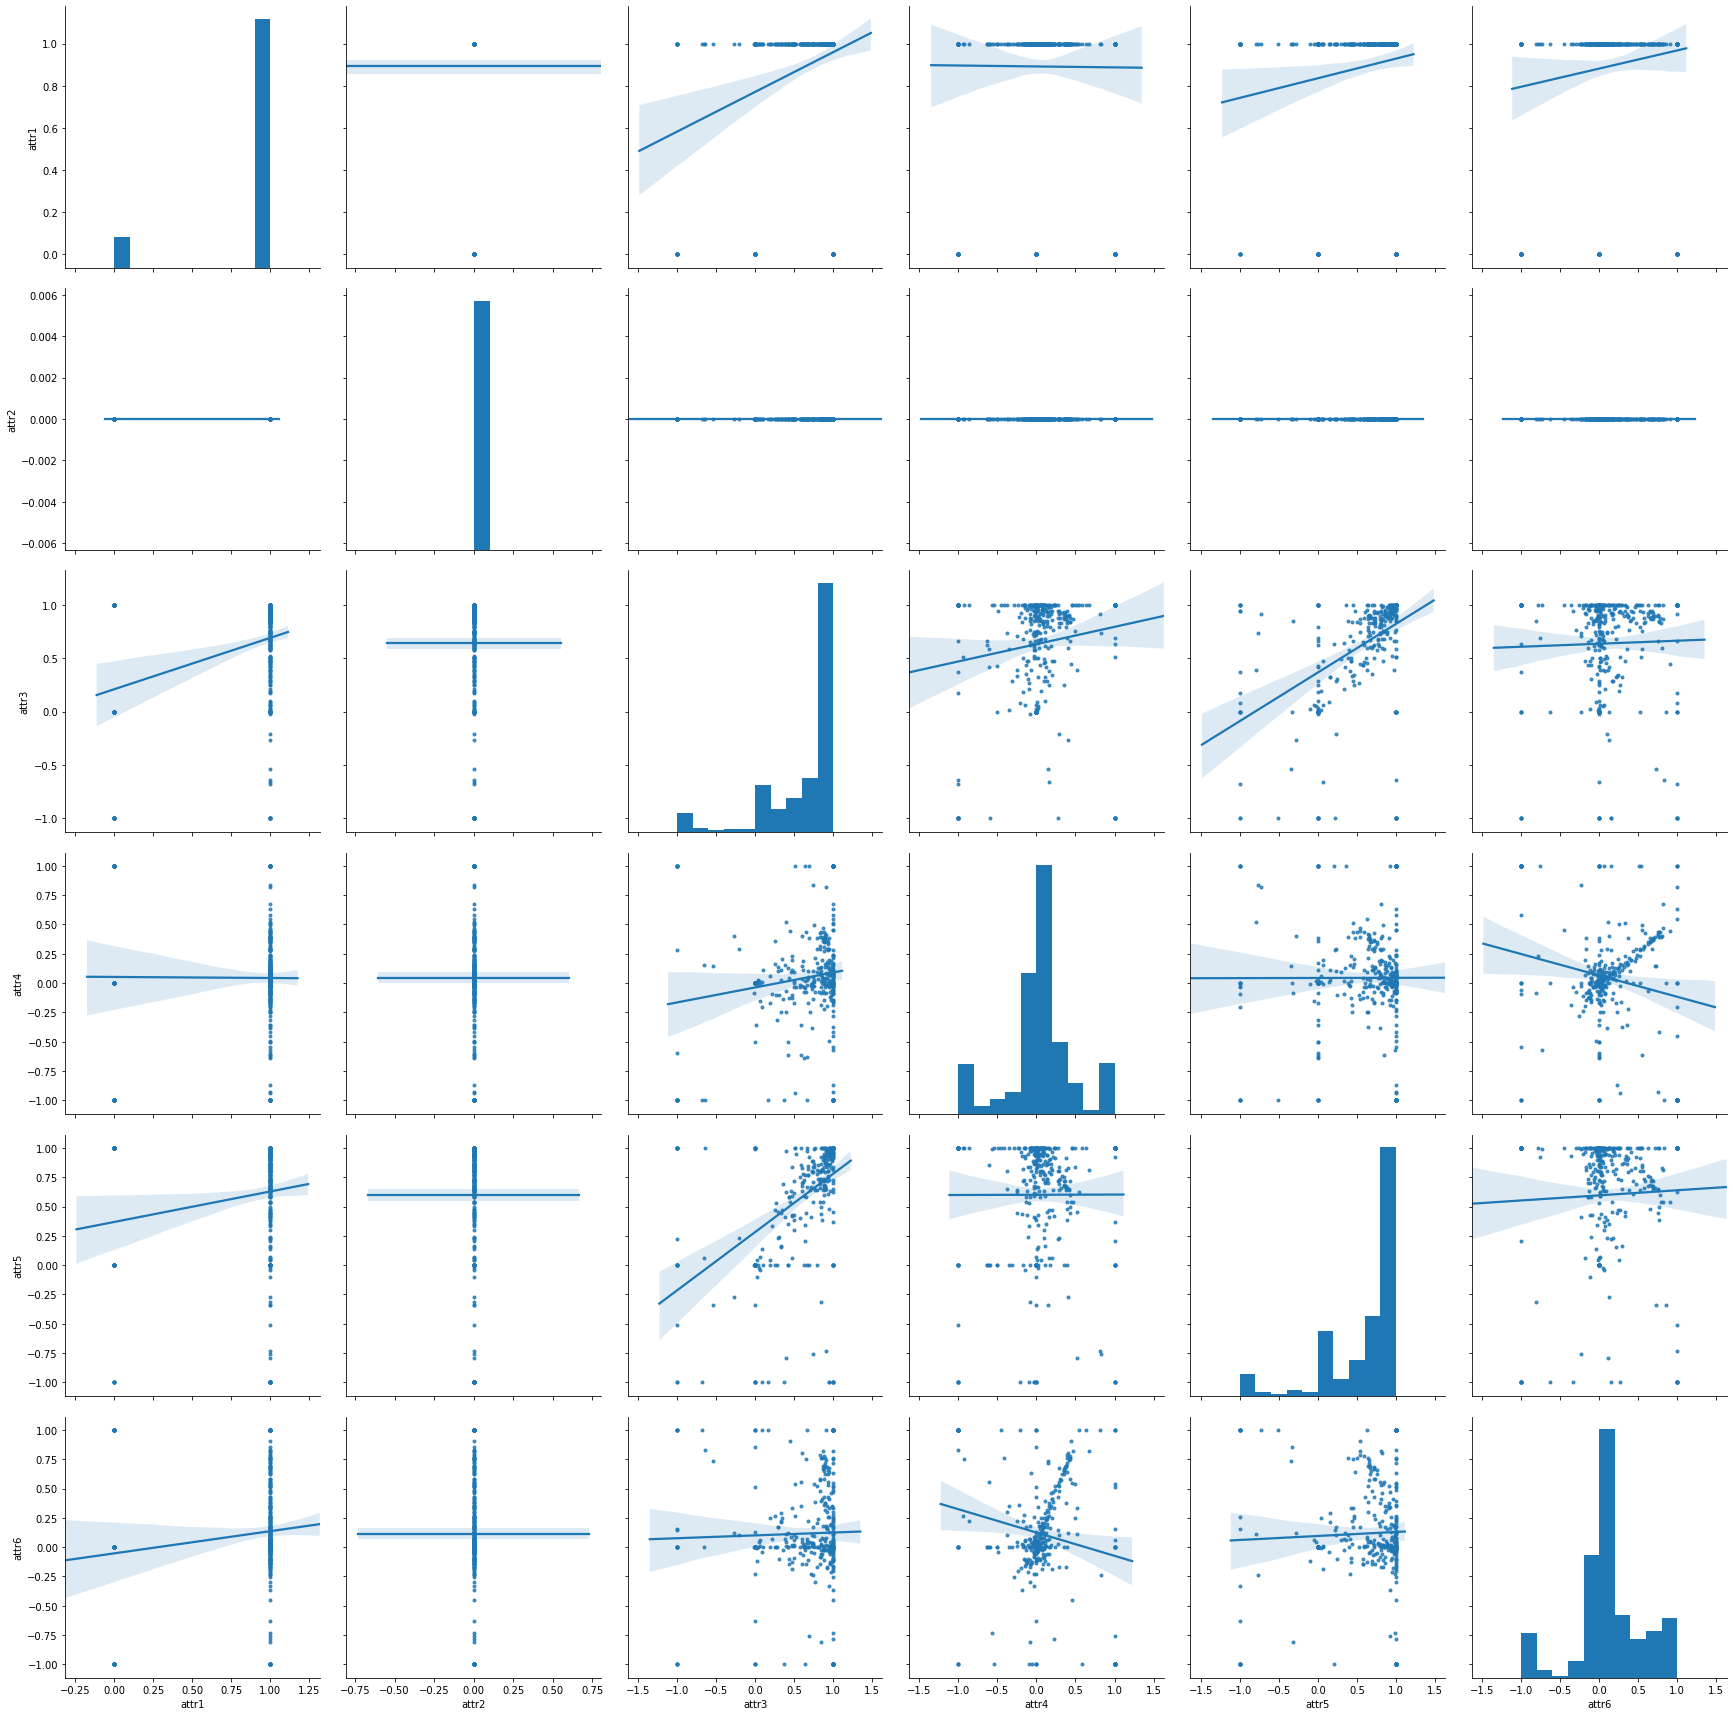

In [16]:
df_n=df[['attr1','attr2','attr3','attr4','attr5','attr6','label']]
sns.pairplot(df_n , height=4, kind="reg",markers=".")

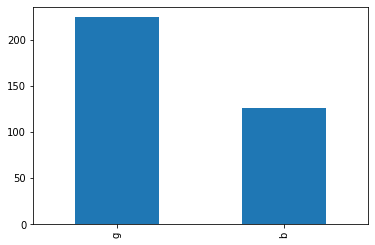

In [15]:
df['label'].value_counts().plot.bar()

In [23]:
Y = df['label']
X = df.drop(columns = ['label'])

In [24]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(Y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, training_scores_encoded, test_size=0.33, random_state=42)

In [26]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [27]:
model_svm = svm.SVC(kernel='rbf')
print(model_svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [28]:
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
y_predicted = model_svm.predict(X_test)

In [30]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86        40
           1       0.89      0.99      0.94        76

    accuracy                           0.91       116
   macro avg       0.93      0.88      0.90       116
weighted avg       0.92      0.91      0.91       116



In [31]:
print(confusion_matrix(y_test, y_predicted))

[[31  9]
 [ 1 75]]
